In [1]:
from IPython.display import display, Markdown
import numpy as np
def set_frame_style(df, caption="", font_size ='20px' ):
    random_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap=random_list[np.random.randint(1,17)]).set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Brown'),
        ('font-size', font_size),
        ('font-weight','bold')
    ]}])

<center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:280%;text-align:center;border-radius: 9px 5px;padding : 9px">Bank Customer Churn Prediction</p>   </span></font></center> 

 <img src="https://emyrael.github.io/assets/img/churn.png" height="1000" width="1000" style="object-fit: cover;">

<div class="anchor" id="top" style=" margin-right: auto; margin-left: auto; padding: 10px; font-size : 15px; background-color: #DFFFFE; border-radius: 2px; font-color :  #581845  ; border: 2px solid #581845;"> Customer Churn : Customer churn is the percentage of customers who stop buying a business's products or services over a certain period of time. It's also known as customer attrition, customer turnover, or customer defection

# <center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Table of contents </p>   </span></font></center> 

# Table of Contents

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #DFFFFE;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
 
- [About the dataset](#1)
    - [1.1 Dataset Description](#1.1)
- [2. Importing the data](#2)
    - [2.1 Columns creation](#2.1)
- [3. Exploratory Data Analysis](#3)
    - [3.1 Distribution of Features](#3.1)
    - [3.2 Insights](#3.2)
- [4. Preprocessing](#4)
    - [4.1 RobustScaler](#4.1)  
    - [4.2 One Hot Encoding](#4.2) 
- [5. Model Training](#5)
    - [5.1 XGB Classifier](#5.1)
    - [5.2 LGBM Classifier](#5.2)
    - [5.2 Neural Network](#5.3)
    - [5.3 CatBoost Classifier](#5.4)
    - [5.4  Hyperparameter Optimization](#5.5)
    - [5.5 Ensemble(XGB, LGBM, CatBoost](#5.6)
- [6. Model Inference](#6)
    - [6.1 Feature Importance](#6.1) 


# <a id="1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">About the dataset </p>   </span></font></center> 

# About the dataset



# <a id="1.1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:150%;text-align:center;border-radius:5px 5px;padding : 5px">Dataset Description </p>   </span></font></center> 

## Dataset Description

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #DFFFFE;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)



# <a id="2"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Importing the data </p>   </span></font></center> 

#  💽 Importing the data

In [2]:
import pandas as pd
syn_df= pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
syn_df = syn_df.drop('id',axis =1)
original_df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
ids = test_df['id']
display(syn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


None

In [3]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
ids.nunique()

110023

In [5]:
set_frame_style(syn_df.head(),'Training Data')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.000000,3,0.000000,2,1.000000,0.000000,181449.970000,0
1,15749177,Okwudiliolisa,627,France,Male,33.000000,1,0.000000,2,1.000000,1.000000,49503.500000,0
2,15694510,Hsueh,678,France,Male,40.000000,10,0.000000,2,1.000000,0.000000,184866.690000,0
3,15741417,Kao,581,France,Male,34.000000,2,148882.540000,1,1.000000,1.000000,84560.880000,0
4,15766172,Chiemenam,716,Spain,Male,33.000000,5,0.000000,2,1.000000,1.000000,15068.830000,0


In [6]:
print(f' Total Number of Unique Surnames : {syn_df.Surname.nunique()}')

 Total Number of Unique Surnames : 2797


In [7]:
print(f' Total Number of Unique Countries : {syn_df.Geography.nunique()}')

 Total Number of Unique Countries : 3


In [8]:
original_df = original_df.drop(['RowNumber'],axis =1)
set_frame_style(original_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.000000,2,0.000000,1,1.000000,1.000000,101348.880000,1
1,15647311,Hill,608,Spain,Female,41.000000,1,83807.860000,1,0.000000,1.000000,112542.580000,0
2,15619304,Onio,502,France,Female,42.000000,8,159660.800000,3,1.000000,0.000000,113931.570000,1
3,15701354,Boni,699,France,Female,39.000000,1,0.000000,2,0.000000,0.000000,93826.630000,0
4,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.820000,1,nan,1.000000,79084.100000,0


In [9]:
display(pd.DataFrame(syn_df.isna().value_counts()))

,,,,,,,,,,,,,count
CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,
False,False,False,False,False,False,False,False,False,False,False,False,False,165034


In [10]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(syn_df.columns) :
    nunique =syn_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)

Unique values in synthetically generated dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|    CustomerId   |     23221     |
|     Surname     |      2797     |
|   CreditScore   |      457      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       71      |
|      Tenure     |       11      |
|     Balance     |     30075     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |     55298     |
|      Exited     |       2       |
+-----------------+---------------+


## `Geography`, `Gender` , `Tenure`, ` NumOfProducts`, `HasCrCard`, `IsActiveMember` are the categorical features

In [11]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(original_df.columns) :
    nunique =original_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|    CustomerId   |     10000     |
|     Surname     |      2932     |
|   CreditScore   |      460      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       73      |
|      Tenure     |       11      |
|     Balance     |      6382     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |      9999     |
|      Exited     |       2       |
+-----------------+---------------+


 > ### Both are similar (of course it was synthetically generated from the original one, but it's a good practice to check when merging both dataframes)

In [12]:
df = pd.concat([syn_df,original_df], axis =0)

df = df.dropna()
df = df.sample(frac = 1).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175032 entries, 0 to 175031
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       175032 non-null  int64  
 1   Surname          175032 non-null  object 
 2   CreditScore      175032 non-null  int64  
 3   Geography        175032 non-null  object 
 4   Gender           175032 non-null  object 
 5   Age              175032 non-null  float64
 6   Tenure           175032 non-null  int64  
 7   Balance          175032 non-null  float64
 8   NumOfProducts    175032 non-null  int64  
 9   HasCrCard        175032 non-null  float64
 10  IsActiveMember   175032 non-null  float64
 11  EstimatedSalary  175032 non-null  float64
 12  Exited           175032 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.4+ MB


# <a id="3"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Feature Engineering </p>   </span></font></center> 
    

## Feature Engineering

#### Age Categories : 

In [13]:
def age_tr(df) : 
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    return df

df = age_tr(df)
test_df = age_tr(test_df)
original_df = age_tr(original_df)

#### Credit Score Ranges:

In [14]:
def cred_score_tr(df) : 
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900], labels=['0-300', '300-600', '600-700', '700-800', '900+'])
    return df
df = cred_score_tr(df)
test_df = cred_score_tr(test_df)
original_df = cred_score_tr(original_df)

#### Account Balance to Salary Ratio

In [15]:
def acc_sal_tr(df):

    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

df = acc_sal_tr(df)
test_df = acc_sal_tr(test_df)
original_df = acc_sal_tr(original_df)

#### Geography and Gender Interaction

In [16]:
def geo_gender_tr(df) : 
    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
    return df

df = geo_gender_tr(df)
test_df = geo_gender_tr(test_df)
original_df = geo_gender_tr(original_df)

#### Total Products Used

In [17]:
def total_pr_tr(df) :
    df['Total_Products_Used'] = df['NumOfProducts'] + df['HasCrCard']
    return df

df = total_pr_tr(df)
test_df = total_pr_tr(test_df)
original_df = total_pr_tr(original_df)

#### Gender and Total Products Interaction

In [18]:
def tp_gender_tr(df) : 
    df['Tp_Gender'] = df['Total_Products_Used'].astype('str') + df['Gender']
    return df

df = tp_gender_tr(df)
test_df = tp_gender_tr(test_df)
original_df = tp_gender_tr(original_df)


#### TF-IDF for Encoding Surnames : Credit [@arunklenin](https://www.kaggle.com/code/arunklenin/ps4e1-advanced-feature-engineering-ensemble?scriptVersionId=157561661&cellId=30)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


def tf_idf(train, test,original, column,n,p):
    vectorizer=TfidfVectorizer(max_features=n)
    vectors_train=vectorizer.fit_transform(train[column])
    vectors_test=vectorizer.transform(test[column])
    vectors_original=vectorizer.transform(original[column])
    
    svd=TruncatedSVD(p)
    x_pca_train=svd.fit_transform(vectors_train)
    x_pca_test=svd.transform(vectors_test)
    x_pca_original = svd.transform(vectors_original)
    tfidf_df_train=pd.DataFrame(x_pca_train)
    tfidf_df_test=pd.DataFrame(x_pca_test)
    tfidf_df_original=pd.DataFrame(x_pca_original)

    
    cols=[(column+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
    tfidf_df_train.columns=cols
    tfidf_df_test.columns=cols
    tfidf_df_original.columns = cols
    train=pd.concat([train,tfidf_df_train], axis="columns")
    test=pd.concat([test,tfidf_df_test], axis="columns")
    original=pd.concat([original,tfidf_df_original], axis="columns")
    
    return train, test , original

df,test_df, original_df=tf_idf(df,test_df,original_df, "Surname",1000,5)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175032 entries, 0 to 175031
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CustomerId            175032 non-null  int64   
 1   Surname               175032 non-null  object  
 2   CreditScore           175032 non-null  int64   
 3   Geography             175032 non-null  object  
 4   Gender                175032 non-null  object  
 5   Age                   175032 non-null  float64 
 6   Tenure                175032 non-null  int64   
 7   Balance               175032 non-null  float64 
 8   NumOfProducts         175032 non-null  int64   
 9   HasCrCard             175032 non-null  float64 
 10  IsActiveMember        175032 non-null  float64 
 11  EstimatedSalary       175032 non-null  float64 
 12  Exited                175032 non-null  int64   
 13  Age_Category          174892 non-null  category
 14  Credit_Score_Range    175032 non-nul

In [21]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age_Category', 'Credit_Score_Range',
       'Balance_Salary_Ratio', 'Geo_Gender', 'Total_Products_Used',
       'Tp_Gender', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4'],
      dtype='object')

# <a id="3"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">EDA </p>   </span></font></center> 
    

# 📊 Exploratory Data Analysis

In [22]:
syn_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(original_df.columns) :
    nunique =original_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+----------------------+---------------+
|       Features       | Unique Values |
+----------------------+---------------+
|      CustomerId      |     10000     |
|       Surname        |      2932     |
|     CreditScore      |      460      |
|      Geography       |       3       |
|        Gender        |       2       |
|         Age          |       73      |
|        Tenure        |       11      |
|       Balance        |      6382     |
|    NumOfProducts     |       4       |
|      HasCrCard       |       2       |
|    IsActiveMember    |       2       |
|   EstimatedSalary    |      9999     |
|        Exited        |       2       |
|     Age_Category     |       5       |
|  Credit_Score_Range  |       4       |
| Balance_Salary_Ratio |      6384     |
|      Geo_Gender      |       6       |
| Total_Products_Used  |       5       |
|      Tp_Gender       |       11      |
|   Surname_tfidf_0    |      1007     |
|   Surname_tfidf_1

In [24]:
numeric_cols= ['CreditScore',  'Age',  'Balance', 'EstimatedSalary','Balance_Salary_Ratio','Tenure', "Surname_tfidf_0",'Surname_tfidf_1',
       'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4']
original_cols = ['CreditScore',  'Age',  'Balance', 'EstimatedSalary','Balance_Salary_Ratio','Tenure',"Surname_tfidf_0",'Surname_tfidf_1',
       'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4']
test_to_scale = test_df[numeric_cols]
train_to_scale = df[numeric_cols]
set_frame_style(train_to_scale.head(), 'Features with continuous values')
train_to_scale_original = original_df[original_cols]

## <a id="3.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Distributions of Features </p>   </span></font></center> 

# 📈 Feature Distribution

In [25]:
# from plotly.subplots import make_subplots
# import random
# import plotly.graph_objects as go
# columns = list(train_to_scale_original.columns)
# ultra_light_colors = [
# "#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
# ]
# fig = make_subplots(rows=len(columns), cols=2)
# count = 0
# for row in range(int(len(columns))) : 
#     random_col = f"RGB({random.randint(100, 255)}, {random.randint(100, 255)}, {random.randint(150, 255)})"
#     fig.add_trace(go.Violin(y=train_to_scale[numeric_cols][columns[count]], x0 = columns[count], box_visible=True, line_color='black',
#                                meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 1)
#     fig.add_trace(go.Violin(y= train_to_scale_original[columns[count]],x0 = columns[count], box_visible=True, line_color='black',
#                                meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 2)
 
    
#     count +=1


# fig.update_layout(height=1000, width=800, title_text="Feature Distribution in Synthetic (Left) vs Original Dataset (Right)",showlegend=False,paper_bgcolor= '#F5F5F5')
# fig.show()


In [26]:
set_frame_style(pd.DataFrame(df.Exited.value_counts()), 'Data points per class', '15px')

,count
Exited,
0,138073
1,36959


In [27]:
# classes = list(df.Exited.unique())

# ultra_light_colors = [
# "#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
# ]
# def col_per_class(col):
#     fig = go.Figure()
#     for clas in classes : 
#         fig.add_trace(go.Violin(y = df[col][df['Exited']== clas],   box_visible=True,
#                             meanline_visible=True , x = df['Exited'][df['Exited'] == clas], name = str(clas) ))
#         fig.update_layout(title = f'Distribution for {col} for each class', plot_bgcolor = ultra_light_colors[np.random.randint(1,10)],paper_bgcolor= '#F5F5F5', height=400,  
#         width=1000 )
#     return fig
# for i in df : 
#     fig = col_per_class(i)
#     fig.show()

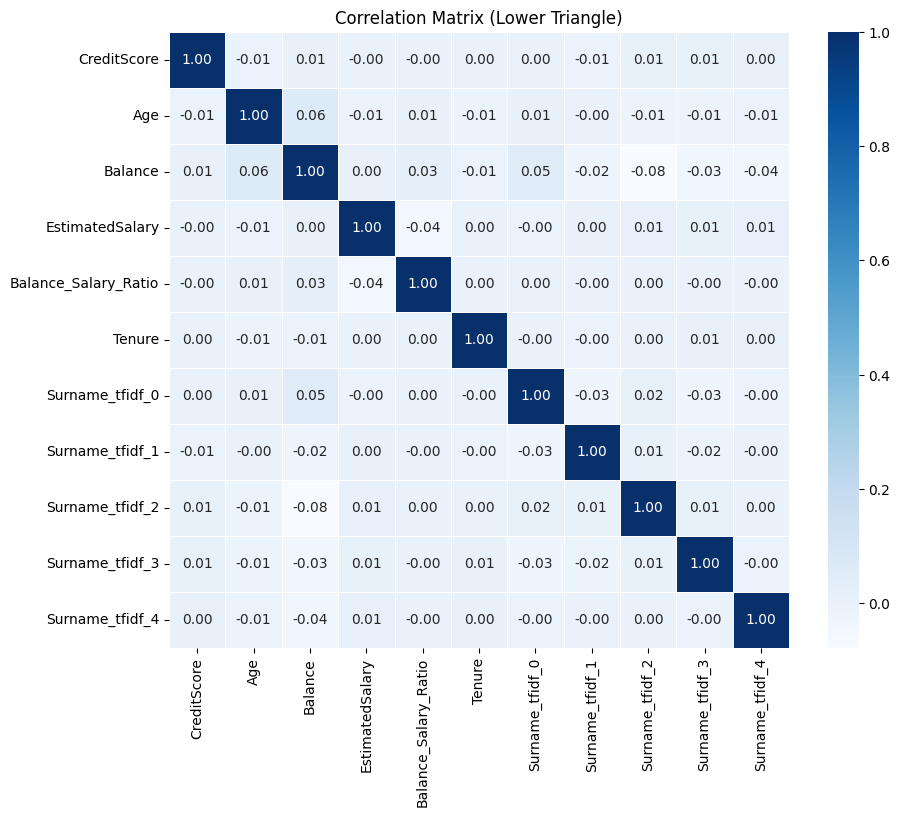

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_to_scale.corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

# <a id="4"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Preprocessing</p>   </span></font></center> 

# ⚙️ Preprocessing

In [29]:
set_frame_style(df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,Credit_Score_Range,Balance_Salary_Ratio,Geo_Gender,Total_Products_Used,Tp_Gender,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4
0,15624471,Trevisani,633,Germany,Male,30.000000,3,131033.760000,1,1.000000,0.000000,179436.600000,0,18-30,600-700,0.730251,Germany_Male,2.000000,2.0Male,0.000467,-0.000367,0.001197,0.000207,-0.001950
1,15586518,Hsia,637,France,Male,45.000000,9,140700.610000,1,1.000000,0.000000,81478.510000,1,40-50,600-700,1.726843,France_Male,2.000000,2.0Male,0.000022,0.999818,0.009680,-0.001318,0.001945
2,15803337,Nwankwo,619,France,Male,34.000000,2,0.000000,2,1.000000,1.000000,50578.400000,0,30-40,600-700,0.000000,France_Male,3.000000,3.0Male,-0.001280,0.001960,0.002411,0.004510,-0.020747
3,15682355,Chukwufumnanya,539,Spain,Female,61.000000,3,147832.270000,1,0.000000,1.000000,88941.300000,1,60+,300-600,1.662133,Spain_Female,1.000000,1.0Female,0.000002,-0.000014,-0.000000,0.000026,-0.000110
4,15605965,Ulyanova,687,Germany,Male,41.000000,5,104016.820000,1,1.000000,0.000000,97623.210000,0,40-50,600-700,1.065493,Germany_Male,2.000000,2.0Male,-0.000000,-0.000000,-0.000000,-0.000000,0.000000


# <a id="4.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">Robust Scaler</p>   </span></font></center> 
> ###  It focuses only on the IQR for scaling unless specified/changed
    

# Robustscaler

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Assuming train_to_scale and test_to_scale are your DataFrames
scaled_train = pd.DataFrame(sc.fit_transform(train_to_scale), columns=train_to_scale.columns)
scaled_test = pd.DataFrame(sc.transform(test_to_scale), columns=test_to_scale.columns)


In [31]:
set_frame_style(scaled_train.head())

,CreditScore,Age,Balance,EstimatedSalary,Balance_Salary_Ratio,Tenure,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4
0,-0.284857,-0.911004,1.180590,1.329810,-0.015886,-0.718550,-0.219500,-0.123400,0.079102,-0.138387,-0.037752
1,-0.235565,0.761327,1.334075,-0.597928,-0.005132,1.415827,-0.222856,8.350583,0.150801,-0.152640,-0.000150
2,-0.457378,-0.465049,-0.899905,-1.206018,-0.023765,-1.074279,-0.232669,-0.103687,0.089362,-0.098171,-0.219186
3,-1.443215,2.545148,1.447309,-0.451066,-0.005830,-0.718550,-0.223007,-0.120411,0.068981,-0.140083,-0.019983
4,0.380583,0.315372,0.751627,-0.280213,-0.012268,-0.007091,-0.223023,-0.120291,0.068982,-0.140323,-0.018925


In [32]:
train_ohe = df.drop(numeric_cols, axis =1)
train_to_ohe = train_ohe.drop(['CustomerId','Exited','Surname'], axis =1)
test_ohe = test_df.drop(numeric_cols, axis =1)
test_to_ohe = test_ohe.drop(['id','CustomerId','Surname'],axis =1)
set_frame_style(train_to_ohe.head())

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Age_Category,Credit_Score_Range,Geo_Gender,Total_Products_Used,Tp_Gender
0,Germany,Male,1,1.000000,0.000000,18-30,600-700,Germany_Male,2.000000,2.0Male
1,France,Male,1,1.000000,0.000000,40-50,600-700,France_Male,2.000000,2.0Male
2,France,Male,2,1.000000,1.000000,30-40,600-700,France_Male,3.000000,3.0Male
3,Spain,Female,1,0.000000,1.000000,60+,300-600,Spain_Female,1.000000,1.0Female
4,Germany,Male,1,1.000000,0.000000,40-50,600-700,Germany_Male,2.000000,2.0Male


In [33]:
set_frame_style(test_to_ohe.head())

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Age_Category,Credit_Score_Range,Geo_Gender,Total_Products_Used,Tp_Gender
0,France,Female,2,0.000000,1.000000,18-30,300-600,France_Female,2.000000,2.0Female
1,France,Female,1,1.000000,0.000000,40-50,600-700,France_Female,2.000000,2.0Female
2,France,Female,2,1.000000,0.000000,30-40,600-700,France_Female,3.000000,3.0Female
3,France,Male,1,1.000000,0.000000,30-40,600-700,France_Male,2.000000,2.0Male
4,Germany,Male,1,1.000000,0.000000,30-40,700-800,Germany_Male,2.000000,2.0Male


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    110023 non-null  int64   
 1   CustomerId            110023 non-null  int64   
 2   Surname               110023 non-null  object  
 3   CreditScore           110023 non-null  int64   
 4   Geography             110023 non-null  object  
 5   Gender                110023 non-null  object  
 6   Age                   110023 non-null  float64 
 7   Tenure                110023 non-null  int64   
 8   Balance               110023 non-null  float64 
 9   NumOfProducts         110023 non-null  int64   
 10  HasCrCard             110023 non-null  float64 
 11  IsActiveMember        110023 non-null  float64 
 12  EstimatedSalary       110023 non-null  float64 
 13  Age_Category          109921 non-null  category
 14  Credit_Score_Range    110023 non-nul

## <a id="4.2"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">One-hot encoding the categorical columns</p>   </span></font></center> 

# One-hot Encoding

In [35]:
ohe_train = pd.get_dummies(train_to_ohe, columns =train_to_ohe.columns )
ohe_test  = pd.get_dummies(test_to_ohe, columns = train_to_ohe.columns)
ohe_train = ohe_train.replace({True: 1, False: 0})
ohe_test = ohe_test.replace({True: 1, False: 0})
set_frame_style(ohe_train.head())

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0,Age_Category_18-30,Age_Category_30-40,Age_Category_40-50,Age_Category_50-60,Age_Category_60+,Credit_Score_Range_0-300,Credit_Score_Range_300-600,Credit_Score_Range_600-700,Credit_Score_Range_700-800,Credit_Score_Range_900+,Geo_Gender_France_Female,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Total_Products_Used_1.0,Total_Products_Used_2.0,Total_Products_Used_3.0,Total_Products_Used_4.0,Total_Products_Used_5.0,Tp_Gender_1.0Female,Tp_Gender_1.0Male,Tp_Gender_2.0Female,Tp_Gender_2.0Male,Tp_Gender_3.0Female,Tp_Gender_3.0Male,Tp_Gender_4.0Female,Tp_Gender_4.0Male,Tp_Gender_5.0Female,Tp_Gender_5.0Male
0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
ohe_train = ohe_train.drop(['Gender_Male'],axis =1)
ohe_test = ohe_test.drop(['Gender_Male'],axis =1)

## Frequency Encoding

In [37]:
def freq_enc(df) :
    frequency_encoding = df['Surname'].value_counts(normalize=True)
    df['Surname'] = df['Surname'].map(frequency_encoding)
    return df
df = freq_enc(df)
test_df = freq_enc(test_df)

## <a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">Join the scaled and one-hot encoded columns</p>   </span></font></center> 

In [38]:
train_df_1 = pd.concat([ohe_train, scaled_train, df['Surname']], axis =1)
test_df = pd.concat([ohe_test, scaled_test, test_df['Surname']], axis =1)
set_frame_style(train_df_1.head())

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0,Age_Category_18-30,Age_Category_30-40,Age_Category_40-50,Age_Category_50-60,Age_Category_60+,Credit_Score_Range_0-300,Credit_Score_Range_300-600,Credit_Score_Range_600-700,Credit_Score_Range_700-800,Credit_Score_Range_900+,Geo_Gender_France_Female,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Total_Products_Used_1.0,Total_Products_Used_2.0,Total_Products_Used_3.0,Total_Products_Used_4.0,Total_Products_Used_5.0,Tp_Gender_1.0Female,Tp_Gender_1.0Male,Tp_Gender_2.0Female,Tp_Gender_2.0Male,Tp_Gender_3.0Female,Tp_Gender_3.0Male,Tp_Gender_4.0Female,Tp_Gender_4.0Male,Tp_Gender_5.0Female,Tp_Gender_5.0Male,CreditScore,Age,Balance,EstimatedSalary,Balance_Salary_Ratio,Tenure,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,Surname
0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.284857,-0.911004,1.180590,1.329810,-0.015886,-0.718550,-0.219500,-0.123400,0.079102,-0.138387,-0.037752,0.005222
1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.235565,0.761327,1.334075,-0.597928,-0.005132,1.415827,-0.222856,8.350583,0.150801,-0.152640,-0.000150,0.014135
2,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.457378,-0.465049,-0.899905,-1.206018,-0.023765,-1.074279,-0.232669,-0.103687,0.089362,-0.098171,-0.219186,0.006433
3,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.443215,2.545148,1.447309,-0.451066,-0.005830,-0.718550,-0.223007,-0.120411,0.068981,-0.140083,-0.019983,0.002382
4,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.380583,0.315372,0.751627,-0.280213,-0.012268,-0.007091,-0.223023,-0.120291,0.068982,-0.140323,-0.018925,0.000748


In [39]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175032 entries, 0 to 175031
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Geography_France            175032 non-null  int64  
 1   Geography_Germany           175032 non-null  int64  
 2   Geography_Spain             175032 non-null  int64  
 3   Gender_Female               175032 non-null  int64  
 4   NumOfProducts_1             175032 non-null  int64  
 5   NumOfProducts_2             175032 non-null  int64  
 6   NumOfProducts_3             175032 non-null  int64  
 7   NumOfProducts_4             175032 non-null  int64  
 8   HasCrCard_0.0               175032 non-null  int64  
 9   HasCrCard_1.0               175032 non-null  int64  
 10  IsActiveMember_0.0          175032 non-null  int64  
 11  IsActiveMember_1.0          175032 non-null  int64  
 12  Age_Category_18-30          175032 non-null  int64  
 13  Age_Category_3

In [40]:
train_df_1.shape

(175032, 55)

In [41]:
from imblearn.under_sampling import TomekLinks
    
def tomek_links (X,y) : 
    '''Tomek Links are pairs of instances, one from the majority class and one from the minority class,
    that are very close to each other in the feature space. They are used in the context of dealing with
    imbalanced datasets to help balance the class distribution. The key idea is to 
    identify and remove those majority class instances that are near the minority class instances'''

    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)
    
    return X_resampled , y_resampled


## <a id="5"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Model Training</p>   </span></font></center> 

# 🤖 Training

## <a id="5.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">XGBClassifier</p>   </span></font></center> 

In [42]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import  confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

X = train_df_1
y = df['Exited']

# Label encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# X, y_encoded = tomek_links(X, y_encoded)


# XGBoost

In [43]:
from sklearn.metrics import roc_auc_score


#XGBoost parameters
xgb_params = {'max_depth': 8,
 'min_child_weight': 9, 
 'learning_rate': 0.015784217705381666,
 'n_estimators': 928, 
 'subsample': 0.8311128887439883,
 'colsample_bytree': 0.3454344427319984,
 'random_state': 42}



# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]


    # XGBoost model
    xgb_model = XGBClassifier(**xgb_params )

    xgb_model.fit(X_train, y_train )

    # predictions on the validation set
    y_val_pred_prob = xgb_model.predict(X_val)
    y_pred = xgb_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    # results
    cv_results.append(roc_auc)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


Fold 1, AUC Score on Validation Set: 0.7557923319438384
Fold 1, F1 Score on Validation Set: 0.8620349109671329
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.7584666082276164
Fold 2, F1 Score on Validation Set: 0.8602502653449914
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7562947956666881
Fold 3, F1 Score on Validation Set: 0.8630580601500754
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.7520464653101178
Fold 4, F1 Score on Validation Set: 0.8597627402635238
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7545805981155803
Fold 5, F1 Score on Validation Set: 0.8610459236654042
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.7522104647181601
Fold 6, F1 Score on Validation Set

## <a id="5.2"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">LGBM Classifier</p>   </span></font></center> 

# LightGBM

In [44]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier


lgbm_params_1 = {
    'min_child_samples': 12, 
    'learning_rate': 0.02849773542504347,
    'n_estimators': 410, 
    'subsample': 0.31556535683131615, 
    'colsample_bytree': 0.9691366837955018, 
    'reg_alpha': 0.7109904579556621,
    'reg_lambda': 0.8470259353827624,
    'device': 'gpu',
    'verbosity': 0
}
# folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []



for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    lgbm_model = LGBMClassifier(**lgbm_params_1)
    lgbm_model.fit(X_train,y_train)

    y_val_pred_prob = lgbm_model.predict_proba(X_val)
    y_pred = lgbm_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    cv_results.append(roc_auc)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning

Fold 1, AUC-Score on Validation Set: 0.758076439782697
Fold 1, F1 Score on Validation Set: 0.8616315881527326
----------------------------------------------------------------------
Fold 2, AUC-Score on Validation Set: 0.761576042246668
Fold 2, F1 Score on Validation Set: 0.8613508407311089
----------------------------------------------------------------------
Fold 3, AUC-Score on Validation Set: 0.7569142322232449
Fold 3, F1 Score on Validation Set: 0.862603015095042
----------------------------------------------------------------------
Fold 4, AUC-Score on Validation Set: 0.7506778472366581
Fold 4, F1 Score on Validation Set: 0.8574856472369743
----------------------------------------------------------------------
Fold 5, AUC-Score on Validation Set: 0.7560283254745302
Fold 5, F1 Score on Validation Set: 0.8607962684336202
----------------------------------------------------------------------
Fold 6, AUC-Score on Validation Set: 0.7533418431174098
Fold 6, F1 Score on Validation Set: 0

In [45]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{0: 0, 1: 1}


## <a id="5.4"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Catboost Classifier</p>   </span></font></center> 

# CatBoost

In [46]:
from catboost import CatBoostClassifier
catboost_params = {
    'iterations': 848, 
    'depth': 28,
    'min_data_in_leaf': 5,
    'learning_rate': 0.027876808218320774,
    'grow_policy': 'Lossguide',
    'bootstrap_type': 'Bernoulli',
    'eval_metric': 'AUC',  
}

n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    cat_model = CatBoostClassifier(**catboost_params, 
                            random_state=42, verbose =0
                           )
    cat_model.fit(X_train,y_train)

    y_val_pred_prob = cat_model.predict_proba(X_val)
    y_pred = cat_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC- score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

 
    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')


Fold 1, AUC- score on Validation Set: 0.7599362061268202
Fold 1, F1 Score on Validation Set: 0.8630398246597886
----------------------------------------------------------------------
Fold 2, AUC- score on Validation Set: 0.7613683390769138
Fold 2, F1 Score on Validation Set: 0.8611804848321654
----------------------------------------------------------------------
Fold 3, AUC- score on Validation Set: 0.7578424070609966
Fold 3, F1 Score on Validation Set: 0.8628236909689582
----------------------------------------------------------------------
Fold 4, AUC- score on Validation Set: 0.7527965632120228
Fold 4, F1 Score on Validation Set: 0.8584220961369392
----------------------------------------------------------------------
Fold 5, AUC- score on Validation Set: 0.7572096444271791
Fold 5, F1 Score on Validation Set: 0.8613726303462445
----------------------------------------------------------------------
Fold 6, AUC- score on Validation Set: 0.7547500158336147
Fold 6, F1 Score on Validati

## <a id="5.5"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Hyperparameter Optimization Codes</p>   </span></font></center> 

# Hyperparameter Optimization (Optuna)

In [47]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import optuna

# import warnings

# # Suppress FutureWarnings related to is_sparse
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 200, 1000),
#         'depth': trial.suggest_int('depth', 3, 50),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 2, 50),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.2, log=True),
#     }
    
#     cb_optuna = CatBoostClassifier(**params, random_state=42, grow_policy='Lossguide', verbose=0)

#     cv = abs(cross_val_score(cb_optuna, X, y_encoded, cv=10, scoring='roc_auc').mean())
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

 
    
# -----------------------------------------------------------------------------------------------------



# from sklearn.model_selection import  cross_val_score
# def objective_xgb(trial):
#     """Define the objective function for XGBClassifier"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'random_state': trial.suggest_categorical('random_state', [42]),
#         'tree_method': 'hist',  # Use GPU for training
#         'device' : 'cuda',
#         'eval_metric': 'auc',  # Evaluation metric
#         'verbosity': 2,  # Set verbosity to 0 for less output
#     }

#     xgb_model = xgb.XGBClassifier(**params)

#     # Assuming 'X_train' and 'y_train' are your training data
#     cv = abs(cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='roc_auc').mean())

    
#     return cv
# import optuna

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_xgb, n_trials=50)

# # Get the best parameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Create the final XGBClassifier model with the best parameters
# best_xgb_model = xgb.XGBClassifier(**best_params)

# # Train the model on the entire dataset
# best_xgb_model.fit(X, y)

#----------------------------------------------------------------------------------------

# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import optuna

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# def objective_lgbm(trial):
#     """Define the objective function for LGBMClassifier"""

#     params = {
#         'objective': 'binary',  # Objective for binary classification
#         'boosting_type': 'gbdt',
#         'device': 'gpu',
#         'metric': 'auc',  # Evaluation metric
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'random_state': 42,
#     }

#     lgb_model = lgb.LGBMClassifier(**params)

#     # Assuming 'X_train' and 'y_train' are your training data
#     cv = abs(cross_val_score(lgb_model, X_train, y_train, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Create an Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective_lgbm, n_trials=50)

# # Get the best parameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Create the final LGBMClassifier model with the best parameters
# best_lgb_model = lgb.LGBMClassifier(**best_params)

# # Train the model on the entire dataset
# best_lgb_model.fit(X, y)


## <a id="5.6"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Ensemble of XGB, CATBOOST and LGBM</p>   </span></font></center> 

# Ensemble

In [48]:
from sklearn.ensemble import VotingClassifier


# lgb_1 = LGBMClassifier(**lgbm_params )
# xgb_1 = XGBClassifier(**xgb_params )
# cb_1 = CatBoostClassifier(**catboost_params, random_state=42)
Ensemble = VotingClassifier(estimators = [('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)], 
                            voting='soft',
                            weights = [0.3,0.3,0.400]   #Adjust weighting since XGB performs better in local environment
                            )
Ensemble.fit(X, y_encoded)


VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(colsample_bytree=0.9691366837955018,
                                             device='gpu',
                                             learning_rate=0.02849773542504347,
                                             min_child_samples=12,
                                             n_estimators=410,
                                             reg_alpha=0.7109904579556621,
                                             reg_lambda=0.8470259353827624,
                                             subsample=0.31556535683131615,
                                             verbosity=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_...
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=9,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=928, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x7ec7394ff5e0>)],
                 voting='soft', weights=[0.3, 0.3, 0.4])

## <a id="6"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Model Inference</p>   </span></font></center> 

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;"
     
- Ensemble Performs the best. We need to maximise the f1_score and minimise the log_loss for the ensemble

In [49]:
# import optuna

# def objective(trial):
#     lgb_weight = trial.suggest_int('lgb_weight', 0, 50)
#     xgb_weight = trial.suggest_int('xgb_weight', 0, 100 - lgb_weight)
    
#     cb_weight = 100- lgb_weight - xgb_weight

#     weights = [lgb_weight/100, xgb_weight/100, cb_weight/100]
    
#     ensemble = VotingClassifier(estimators=[('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)],
#                                 voting='soft',
#                                 weights=weights)
    
#     ensemble.fit(X, y_encoded)
#     y_pred = ensemble.predict(test_x)
    
#     return f1_score(test_y, y_pred, average='weighted')


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)

# # Get the best parameters
# best_params = study.best_params
# best_weights = [best_params['lgb_weight'], best_params['xgb_weight'], 100- best_params['lgb_weight'] - best_params['xgb_weight']]

# print("Best Weights:", best_weights)


In [50]:
# from sklearn.ensemble import VotingClassifier


# # lgb_1 = LGBMClassifier(**lgbm_params )
# # xgb_1 = XGBClassifier(**xgb_params )
# # cb_1 = CatBoostClassifier(**catboost_params, random_state=42)
# Ensemble = VotingClassifier(estimators = [('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)], 
#                             voting='soft',
#                             weights = best_weights   #Adjust weighting since XGB performs better in local environment
#                             )
# Ensemble.fit(X, y_encoded)


# Model Inference

## <a id="6.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color: #005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Feature Importance</p>   </span></font></center> 

# Feature Importance

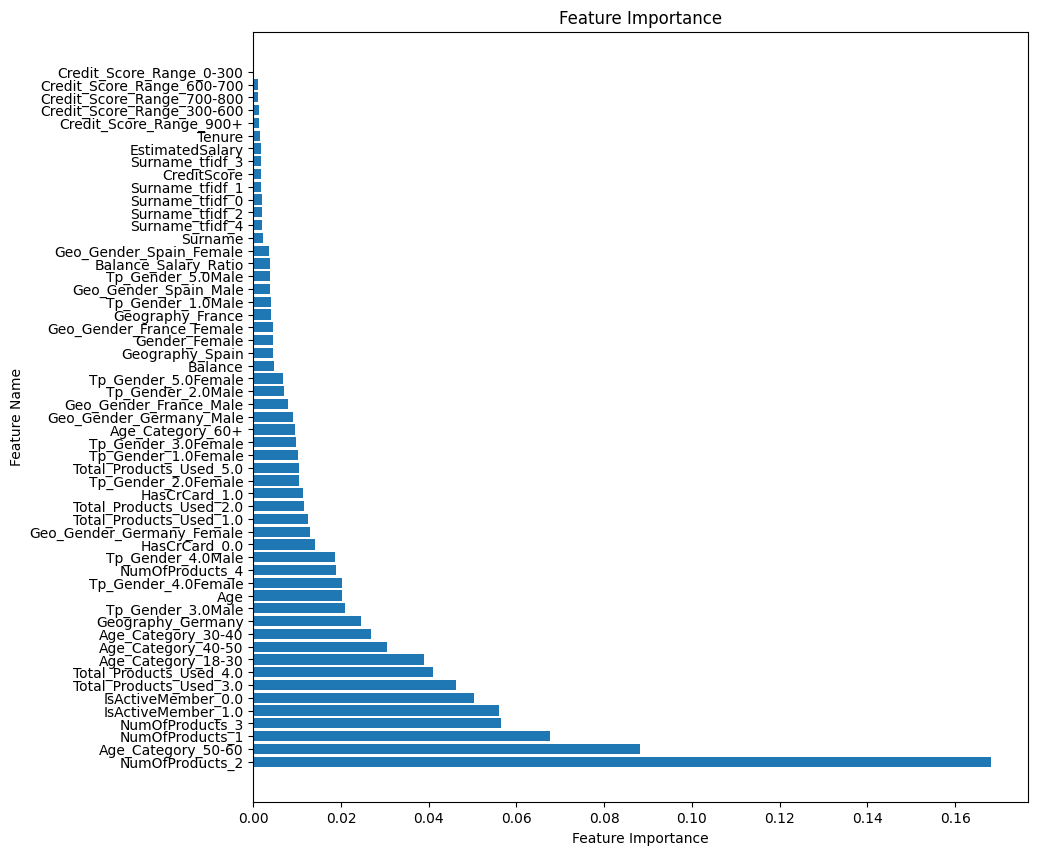

In [51]:
import matplotlib.pyplot as plt
feature_importances = xgb_model.feature_importances_
feature_names = train_df_1.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Geography_France            110023 non-null  int64  
 1   Geography_Germany           110023 non-null  int64  
 2   Geography_Spain             110023 non-null  int64  
 3   Gender_Female               110023 non-null  int64  
 4   NumOfProducts_1             110023 non-null  int64  
 5   NumOfProducts_2             110023 non-null  int64  
 6   NumOfProducts_3             110023 non-null  int64  
 7   NumOfProducts_4             110023 non-null  int64  
 8   HasCrCard_0.0               110023 non-null  int64  
 9   HasCrCard_1.0               110023 non-null  int64  
 10  IsActiveMember_0.0          110023 non-null  int64  
 11  IsActiveMember_1.0          110023 non-null  int64  
 12  Age_Category_18-30          110023 non-null  int64  
 13  Age_Category_3

In [53]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175032 entries, 0 to 175031
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Geography_France            175032 non-null  int64  
 1   Geography_Germany           175032 non-null  int64  
 2   Geography_Spain             175032 non-null  int64  
 3   Gender_Female               175032 non-null  int64  
 4   NumOfProducts_1             175032 non-null  int64  
 5   NumOfProducts_2             175032 non-null  int64  
 6   NumOfProducts_3             175032 non-null  int64  
 7   NumOfProducts_4             175032 non-null  int64  
 8   HasCrCard_0.0               175032 non-null  int64  
 9   HasCrCard_1.0               175032 non-null  int64  
 10  IsActiveMember_0.0          175032 non-null  int64  
 11  IsActiveMember_1.0          175032 non-null  int64  
 12  Age_Category_18-30          175032 non-null  int64  
 13  Age_Category_3

# Final Submission

In [54]:
old_submission_df_1 = pd.read_csv('/kaggle/input/prev-mine-bank/submission_base_2.csv')
old_submission_df_2 = pd.read_csv('/kaggle/input/prev-mine-bank/submission_base_1.csv')
old_submission_df_3 = pd.read_csv('/kaggle/input/prev-mine-bank/submission.csv')
old_submission_df_4 = pd.read_csv('/kaggle/input/prev-mine/prev_4.csv')

In [55]:
old_submission_df_3.head()

,id,Exited
0,165034,0.013008
1,165035,0.832930
2,165036,0.014764
3,165037,0.191605
4,165038,0.413875


In [56]:
y_pred = Ensemble.predict_proba(test_df)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Non-Exited', 'Exited']
y_pred.head()

,Non-Exited,Exited
0,0.979174,0.020825
1,0.284670,0.715330
2,0.976077,0.023923
3,0.785532,0.214468
4,0.613619,0.386381


In [57]:
submission_df = pd.DataFrame()
submission_df = y_pred  
submission_df['id'] = ids
submission_df = (submission_df +old_submission_df_1 +old_submission_df_2 +7*old_submission_df_3 )/10

In [58]:
submission_df['id'] = submission_df['id'].apply(lambda x : int(x))
submission_df = submission_df.drop('Non-Exited',axis =1)
submission_df.head()

,Exited,id
0,0.013662,165034
1,0.823713,165035
2,0.015596,165036
3,0.193463,165037
4,0.410462,165038


In [59]:
submission_df.to_csv('submission.csv', index= False)